# **Image Enhancement using Laplacian Method**

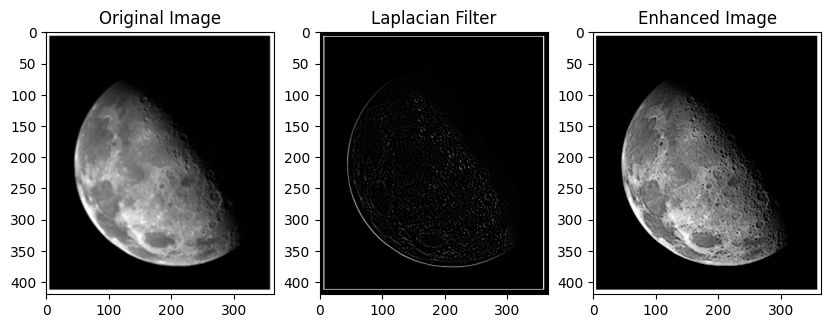

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_image_laplacian(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not read the image.")
        return

    # Define Laplacian kernel
    laplacian_kernel = np.array([[1, 1, 1],
                                  [1, -8, 1],
                                  [1, 1, 1]])

    # Apply the Laplacian filter using convolution
    laplacian = cv2.filter2D(image, -1, laplacian_kernel)
    # The -1 argument specifies the desired depth (bit-depth or data type) of the output image.

    # Enhance the image using the equation: Enhanced = Original - Laplacian
    enhanced_image = cv2.subtract(image, laplacian)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 3, 2), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian Filter')
    plt.subplot(1, 3, 3), plt.imshow(enhanced_image, cmap='gray'), plt.title('Enhanced Image')
    plt.show()

# Example usage
image_path = 'moon.png'  # Replace with your image file path
enhance_image_laplacian(image_path)

# **Unsharp Mask and High Boost Filtering**

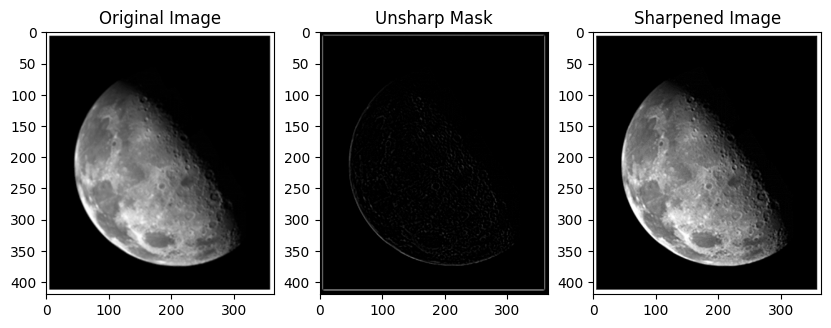

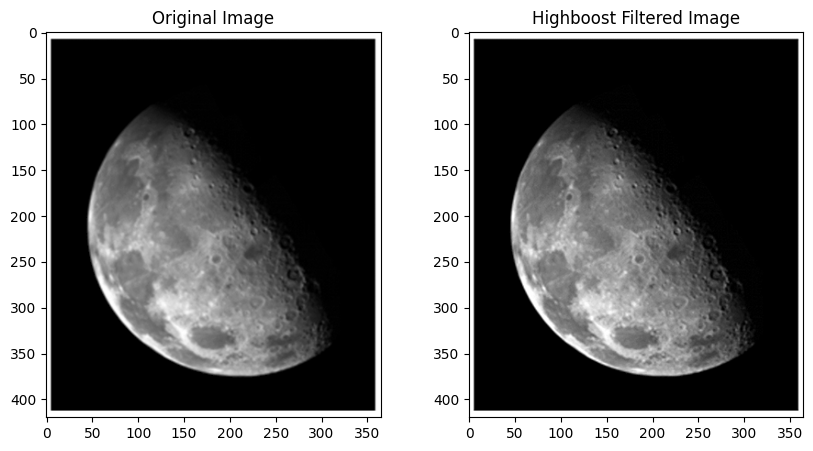

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def unsharp_masking(image, k=1.5):
    # Read the image in grayscale
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not read the image.")
        return

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Compute unsharp mask
    mask = cv2.subtract(image, blurred)

    # Apply unsharp masking
    sharpened = cv2.addWeighted(image, 1.0 + k, blurred, -k, 0)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 3, 2), plt.imshow(mask, cmap='gray'), plt.title('Unsharp Mask')
    plt.subplot(1, 3, 3), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpened Image')
    plt.show()

def highboost_filtering(image, A=2.0):
    # Read the image in grayscale
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not read the image.")
        return

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Compute highboost filter
    highboost = cv2.addWeighted(image, A, blurred, 1 - A, 0)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(highboost, cmap='gray'), plt.title('Highboost Filtered Image')
    plt.show()

# Example usage
image_path = 'moon.png'  # Replace with your image file path
unsharp_masking(image_path, k=1.5)
highboost_filtering(image_path, A=2.0)

# **Gradient Methods**

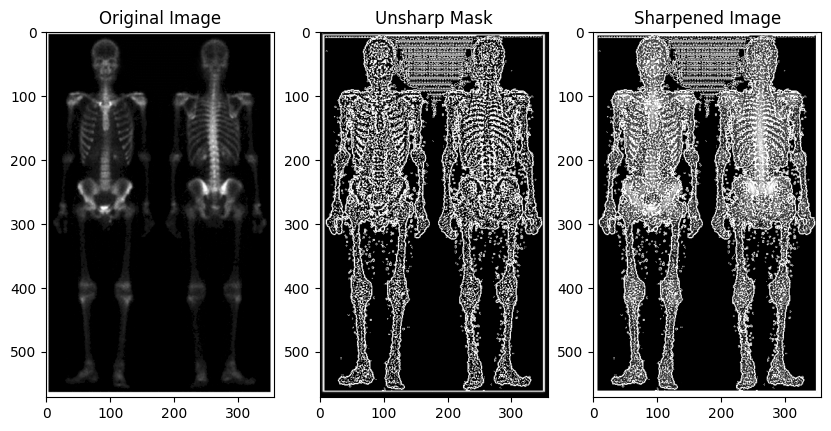

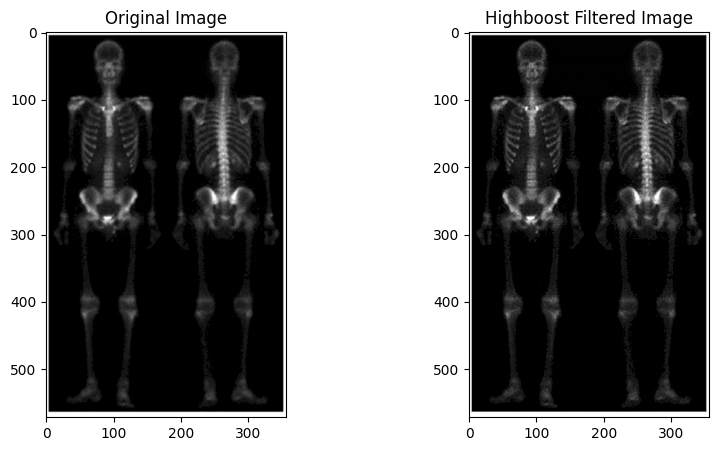

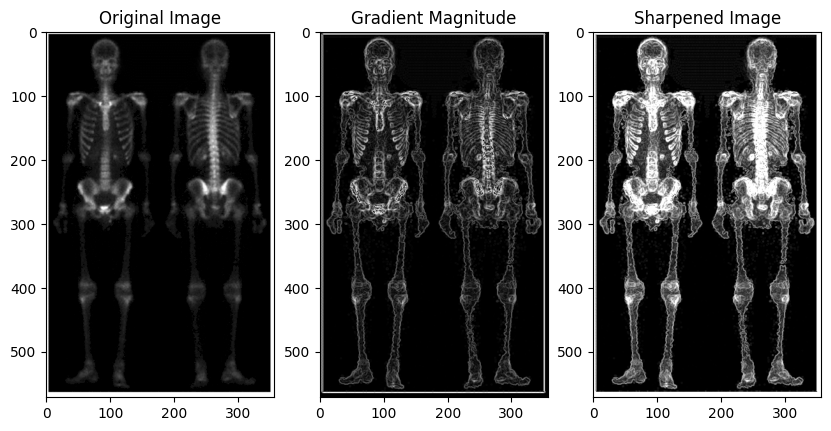

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def unsharp_masking(image, k=1.5):
    # Read the image in grayscale
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not read the image.")
        return

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Compute unsharp mask
    mask = image - blurred

    # Apply unsharp masking using equation: Sharpened = Image + k * Mask
    sharpened = image + k * mask

    # Clip values to valid range
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 3, 2), plt.imshow(mask, cmap='gray'), plt.title('Unsharp Mask')
    plt.subplot(1, 3, 3), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpened Image')
    plt.show()

def highboost_filtering(image, A=2.0):
    # Read the image in grayscale
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not read the image.")
        return

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Compute highboost filter using equation: Highboost = A * Image - (A - 1) * Blurred
    highboost = A * image - (A - 1) * blurred

    # Clip values to valid range
    highboost = np.clip(highboost, 0, 255).astype(np.uint8)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(highboost, cmap='gray'), plt.title('Highboost Filtered Image')
    plt.show()

def gradient_sharpening(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not read the image.")
        return

    # Compute gradients using Sobel operators
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Compute gradient magnitude using equation: Gradient Magnitude = sqrt(Gx^2 + Gy^2)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    gradient_magnitude = np.uint8(gradient_magnitude)

    # Sharpen the image using equation: Sharpened = Image + k * Gradient Magnitude
    sharpened_image = image + 1.5 * gradient_magnitude

    # Clip values to valid range
    sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 3, 2), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('Gradient Magnitude')
    plt.subplot(1, 3, 3), plt.imshow(sharpened_image, cmap='gray'), plt.title('Sharpened Image')
    plt.show()

# Example usage
image_path = 'sk.png'  # Replace with your image file path
unsharp_masking(image_path, k=1.5)
highboost_filtering(image_path, A=2.0)
gradient_sharpening(image_path)